In [ ]:
# Title: Inlämningsuppgift 3
# importera moduler som behövs

import numpy as np                  # importera numpy
import pandas as pd                 # importera pandas
import os                           # importera os för att kunna använda os system kommender
import matplotlib.pyplot as plt     # importera matplotlib.pyplot för att kunna göra grafer
import gauss as g                   # importera gauss som är en egen modul

In [ ]:
# Gloabala variabler
YEAR = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
MONTH = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'OKt', 'Nov', 'Dec']

In [ ]:
# Funktionen för att ladda ner pdf filer från SMHI och spara filer i mappar som kallas efter år
# det här fungerar inte på windows eftesom den linux kommandot wget används
def download_pdf():
    for i in YEAR:
        os.system('mkdir {}'.format(i))
        for j in MONTH:
            url = 'https://www.smhi.se/pd/klimat/pdf_stats/month/SMHI_vov_temperature_wind_'+j.lower()+i[2:]+'.pdf'
            name = str(MONTH.index(j)+1)+'-'+j+'.pdf'
            os.system('cd {} && wget {} -O {}'.format(i,url,name))

In [ ]:
# Ladda ner pdf filer
download_pdf()

In [32]:
# Skapa en diktionär som innehåller data från pdf filer. Data mätas manuellt.
data = {
    'år': ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
    'jan': [0.4,    2.2,    -1.2,   -7,    -1.9,    -0.9,   -3.3,   -1.5,   0.9,    -4.2,   -0.3,   0.2,    -1.7,   4.1,    -1.2,   0.5],
    'feb': [-2.8,   2.9,    -1.8,   -5.3,  -4.3,    -2.8,   -1.3,   2.3,    1.3,    0.5,    0.2,    -3.2,   1.9,    2.9,    -2.0,   0.9],
    'mar': [4.7,    1.7,    1.0,    -0.2,  -1.2,    4.4,    -2.3,   4.5,    3.9,    3.2,    3.3,    -1.6,   2.7,    3.6,    3.5,    4.1],
    'apr': [8.2,    7.4,    8.5,    6.4,    9.1,    4.9,    -4.9,   7.5,    7.4,    6.2,    4.9,    7.1,    7.4,    7.1,    5.3,    5.6],
    'maj': [11.4,   12.0,   12.0,   11.3,   11.8,   12.2,   13.1,   11.1,   10.2,   13.1,   11.3,   16.1,   10.9,   10.1,   10.6,   11.5],
    'jun': [16.6,   16.5,   14.0,   15.7,   17.3,   13.7,   16.5,   14.3,   14.5,   16.5,   15.2,   17.3,   18.4,   18.6,   19.3,   18.1],
    'jul': [17,     18.8,   17.8,   21.2,   19.4,   17.7,   18.4,   20.7,   17.0,   19.0,   17.4,   22.5,   17.7,   17.0,   21.2,   18.4],
    'aug': [17.8,   9.8,    17.5,   17.2,   17.3,   16.8,   17.8,   17.4,   18.2,   16.9,   17.0,   19.3,   18.0,   19.3,   16.0,   19.8],
    'sep': [12.2,   11.4,   14.2,   12.0,   14.1,   12.3,   13.0,   13.6,   13.5,   15.3,   13.1,   14.3,   13.1,   14.2,   12.7,   12.2],
    'okt': [7.7,    8.4,    5.7,    6.4,    8.5,    6.8,    8.8,    9.5,    8.1,    7.2,    8.0,    8.7,    7.2,    9.3,    9.3,    10.1],
    'nov': [2.4,    3.3,    5.6,    0.3,    6.1,    4.6,    4.4,    5.5,    5.0,    2.0,    3.8,    4.5,    4.0,    6.9,    3.7,    5.5],
    'dec': [1.8,    1.5,    -1.4,   -6.6,   2.5,    -3.0,   3.4,    0.5,    4.1,    2.2,    1.5,    0.8,    3.0,    4.0,    -1.6,   -1.4]
}

# Skapa en pandas dataframe och spara den som en csv fil
dataset = pd.DataFrame(data)
dataset.set_index('år')
dataset.to_csv('csv_fil.csv', index=False)

# Skriv ut datasetet
print(dataset)


      år  jan  feb  mar  apr   maj   jun   jul   aug   sep   okt  nov  dec
0   2007  0.4 -2.8  4.7  8.2  11.4  16.6  17.0  17.8  12.2   7.7  2.4  1.8
1   2008  2.2  2.9  1.7  7.4  12.0  16.5  18.8   9.8  11.4   8.4  3.3  1.5
2   2009 -1.2 -1.8  1.0  8.5  12.0  14.0  17.8  17.5  14.2   5.7  5.6 -1.4
3   2010 -7.0 -5.3 -0.2  6.4  11.3  15.7  21.2  17.2  12.0   6.4  0.3 -6.6
4   2011 -1.9 -4.3 -1.2  9.1  11.8  17.3  19.4  17.3  14.1   8.5  6.1  2.5
5   2012 -0.9 -2.8  4.4  4.9  12.2  13.7  17.7  16.8  12.3   6.8  4.6 -3.0
6   2013 -3.3 -1.3 -2.3 -4.9  13.1  16.5  18.4  17.8  13.0   8.8  4.4  3.4
7   2014 -1.5  2.3  4.5  7.5  11.1  14.3  20.7  17.4  13.6   9.5  5.5  0.5
8   2015  0.9  1.3  3.9  7.4  10.2  14.5  17.0  18.2  13.5   8.1  5.0  4.1
9   2016 -4.2  0.5  3.2  6.2  13.1  16.5  19.0  16.9  15.3   7.2  2.0  2.2
10  2017 -0.3  0.2  3.3  4.9  11.3  15.2  17.4  17.0  13.1   8.0  3.8  1.5
11  2018  0.2 -3.2 -1.6  7.1  16.1  17.3  22.5  19.3  14.3   8.7  4.5  0.8
12  2019 -1.7  1.9  2.7  

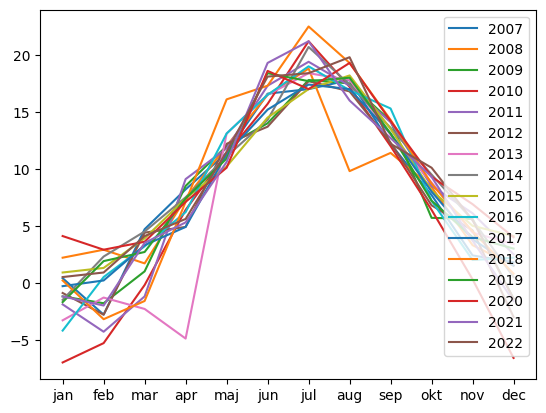

In [33]:
# Läs in csv filen i pandas dataframe
df = pd.read_csv('csv_fil.csv')

# Plotta varje år för att visa data i grafiken
for i in range(len(df)):
    x = df.loc[i].index.tolist()[1:]
    y = df.loc[i].values.tolist()[1:]
    plt.plot(x, y)
plt.legend(YEAR)
plt.show()

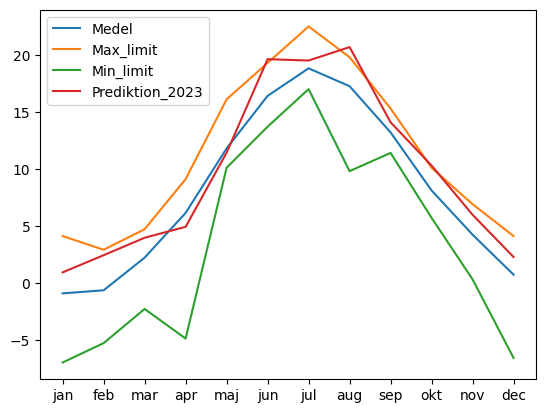

In [34]:
#### MAIN ####
# Skapa en database som en diktionär med max, min, medel och prediktion för 2023


x = [x[2:] for x in YEAR]                       # Skapa en lista med år wiken har tagits bort '20' från år i global variabel YEAR

data_mm = {}                                    # Skapa en tomt dictionär för att spara max, min, medel och prediktion för 2023
for columns in df.columns[1:]:                  # Loopa igenom varje månad

    y = df[columns]                             
    A, Y = g.skapa_norekv_from_df(df, columns)  # Beräkna normala ekvationer
    x_values = g.solve_gauss(A, Y)              # Lösa normala ekvationer med Gausseleminations funktionen
    #g.skriv_ekvation(x_values)
    k, m = x_values[0], x_values[1]             # Spara värder av k och m

    x_t = [float(i) for i in x]                 # Konvertera x till float efetrsom x är en sträng i pandas dataframe 
    y_t = []                                    # Skapa en tom lista för y värden
    for i in x_t:                               # Loopa igenom x värden. Beräkna y värden och spara i y_t vektorn
        temp = k*i+m
        y_t.append(temp)

    # Skapa en prediktion för 2023
    x_p = 23
    y_p = round(k*x_p+m, 2)
    # Skapa en dictionary med max, min, medel och prediktion för 2023 för varje månad
    data_mm[columns] = [df[columns].mean(), df[columns].max(), df[columns].min(), y_p]

# Skapa en pandas dataframe från data_mm
df_mm = pd.DataFrame(data_mm, index=['Medel', 'Max_limit', 'Min_limit', 'Prediktion_2023'])

# Plotta varje år med alla 4 värden
for i in list(df_mm.index):
    x = df_mm.columns
    y = df_mm.loc[i].values.tolist()
    plt.plot(x, y)

# Plotta grafiken med minimi- och maxgränsband, medelvärde och prediktion för 2023
plt.legend(df_mm.index)
plt.show()